<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9.2 가우시안 혼합**

- 가우시안 혼합 모델(GMM)은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델이다.
- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성한다.

다음은 확률 변수 사이의 조건부 의존성의 구조를 나타낸다.
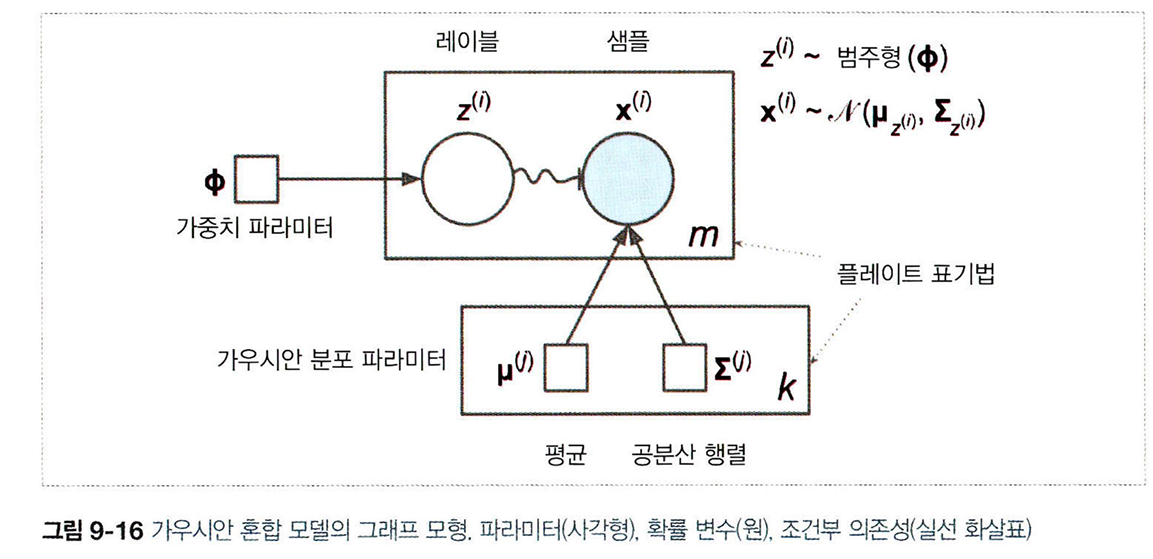

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise= 0.05)

In [3]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [4]:
gm.weights_

array([0.19516003, 0.19638706, 0.60845291])

In [5]:
gm.means_

array([[ 1.76523867, -0.04351652],
       [-0.7662202 ,  0.54919229],
       [ 0.50133832,  0.24774088]])

In [6]:
gm.covariances_

array([[[ 0.04678524,  0.0563317 ],
        [ 0.0563317 ,  0.08400342]],

       [[ 0.04542448,  0.05608298],
        [ 0.05608298,  0.08304931]],

       [[ 0.18353797, -0.11227899],
        [-0.11227899,  0.29196166]]])

- 이 클래스는 기댓값-최대화(EM) 알고리즘을 사용한다.
- 클러스터 파라미터를 랜덤하게 초기화하고 수렴할때까지 두 단계를 반복한다.

- 기댓값 단계 : 샘플에 클러스터를 할당한다 -> 최대화 단계 : 클러스터를 업데이트한다.

In [7]:
gm.converged_

True

In [8]:
gm.n_iter_

18

- 각 클러스터의 위치, 크기, 모양, 방향. 상대적인 가중치를 예측하였다.

In [9]:
gm.predict(X)

array([2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 1, 2,
       2, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 2,

In [10]:
gm.predict_proba(X)

array([[3.56613844e-068, 3.92995731e-046, 1.00000000e+000],
       [3.57593981e-049, 5.09657176e-066, 1.00000000e+000],
       [9.95638991e-001, 8.42086952e-273, 4.36100885e-003],
       ...,
       [4.33970021e-092, 8.75687203e-029, 1.00000000e+000],
       [2.53454771e-096, 2.21714719e-025, 1.00000000e+000],
       [9.98467350e-001, 8.07852045e-261, 1.53265012e-003]])

In [11]:
X_new, y_new = gm.sample(6)
X_new

array([[ 1.72948932, -0.18358326],
       [ 1.66722575, -0.27239466],
       [-0.60109119,  0.73718375],
       [-1.03145116,  0.53154748],
       [ 0.49983972,  0.29641986],
       [ 0.60312807,  0.15837292]])

In [12]:
y_new

array([0, 0, 1, 1, 2, 2])

- 샘플이 주어지면 이 메서드는 그 위치의 확률 밀도 함수의 로그를 에측한다.
- 점수가 높을수록 밀도가 높다.

In [13]:
gm.score_samples(X)

array([-1.38283212e+00, -1.61109302e+00, -9.91540872e-01, -3.18027160e+00,
       -1.67128225e+00, -1.95685469e+00, -1.59462589e+00, -1.02030894e+00,
       -1.92819928e+00, -1.76334988e+00, -1.72977118e+00, -8.10651440e-02,
       -1.99276767e-01, -3.65192335e-01, -3.74527606e-01, -1.73458295e+00,
       -1.41863300e+00,  9.92756827e-02, -6.98380285e-02, -1.82375614e+00,
       -1.46402986e+00, -1.55156358e+00, -2.19196239e+00, -1.96287257e+00,
       -1.73617887e+00, -1.71546017e+00, -7.32011562e-01, -1.32081808e+00,
       -8.97493261e-01, -1.95768229e-01, -2.37638866e+00, -2.03633686e+00,
       -1.70544787e+00, -9.91042330e-01, -1.41844471e+00, -1.44370321e-01,
       -2.22799753e+00, -1.60251712e+00, -1.77917686e+00, -1.48844029e+00,
       -2.06824263e+00, -1.98362313e+00, -1.04203377e+00, -1.74610847e+00,
       -8.81312784e-01, -1.61257391e+00, -2.18078786e+00, -1.02181986e+00,
       -4.27938018e-02, -1.61254236e+00, -7.36486530e-01, -1.86921613e+00,
       -1.89720145e+00,  

- 특성이나 클러스터가 많거나 샘플이 적을 떄는 EM이 최적의 솔루션으로 수렴하기 어렵다.
- 이런 작업의 어려움을 줄이려면 알고리즘이 학습할 파라미터 개수를 제한해야 한다.(클러스터 모양과 방향의 범위를 제한)

- 사이킷런 covariance_type 매개변수에 다음 값 중 하나를 설정해야한다.

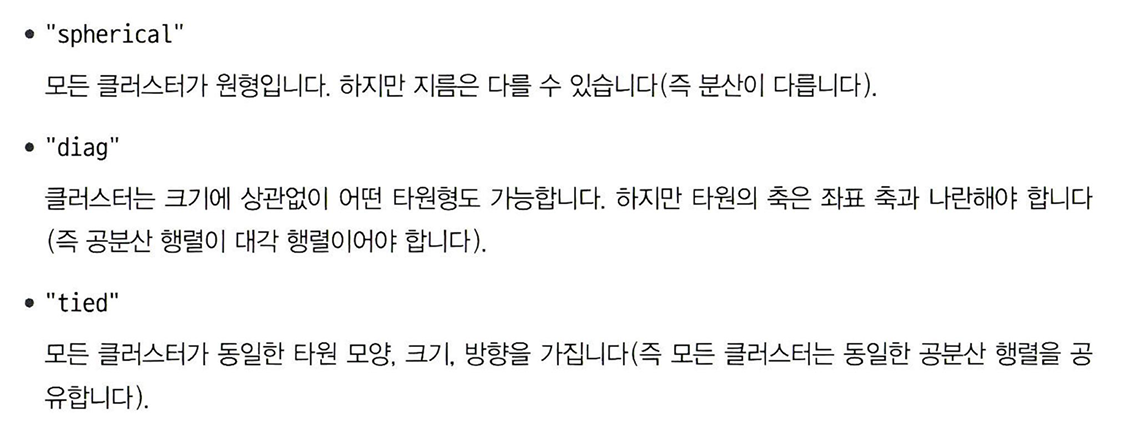

**9.2.1 가우시안 혼합을 사용한 이상치 탐지**

- 가우시안 혼합 모델에서 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다.

In [14]:
import numpy as np

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

- 특이치 탐지는 이상치로 오염되지 않은 '깨끗한' 데이터셋에서 훈련하는 점에서 이상치 탐지와 다르다.

**9.2.2 클러스터 개수 선택하기**

- 이너셔나 실루엣 점수는 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않기 때문에 가우시안 혼합 모델에서는 이런 지표를 사용할 수 없다.
- 대신 BIC, AIC와 같은 이론적 정보 기준을 쵝소화하는 모델을 찾는다.

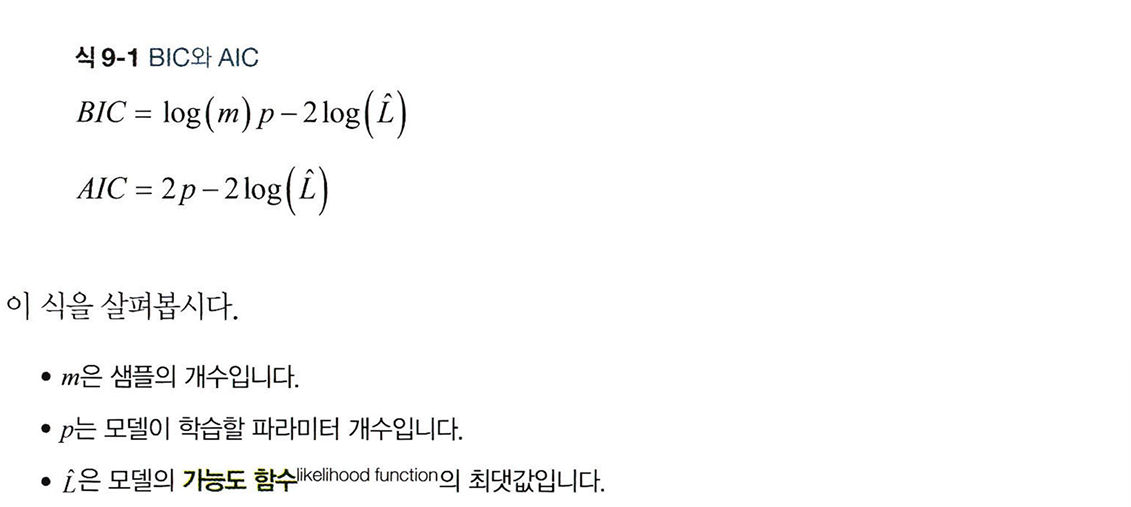

- BIC, AIC는 모두 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더한다.
- 이 둘은 종종 동일한 모델을 선택한다.
- 둘의 선택이 다를 경우 BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있다.

In [15]:
gm.bic(X)

np.float64(2757.6477003064647)

In [16]:
gm.aic(X)

np.float64(2674.2158605637683)

**9.2.3 베이즈 가우시안 혼합 모델**

- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 클래스를 사용할 수 있다.
- 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다.

In [17]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


array([0.12, 0.17, 0.1 , 0.11, 0.13, 0.14, 0.11, 0.  , 0.11, 0.  ])

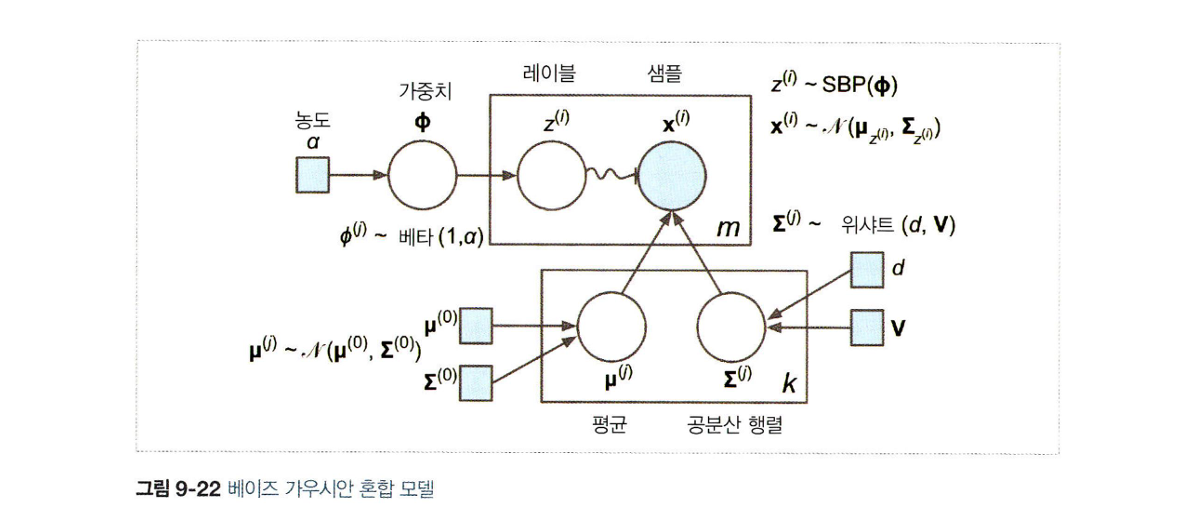

**9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**
- PCA
- Fast-MCD
- 아이솔레이션 포레스트
- LOF
- one-class SVM